In [168]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn import linear_model
import matplotlib.pyplot as plt
import itertools
import scipy.stats as scs
import scipy
%matplotlib inline
plt.style.use('ggplot')
from scipy.optimize import curve_fit

In [20]:
outpatient_2014 = pd.read_csv("data/R_download/2014 - outpatient.csv")
saw_doctor =[]
for row in outpatient_2014['DRSPLTY']:
    if row > 0:
        saw_doctor.append(1)
    else:
        saw_doctor.append(0)

out_dr_fee = outpatient_2014[['DRSPLTY', 'OPXP14X']]

In [21]:
out_dr_fee["saw_physician"] = saw_doctor

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
print out_dr_fee.shape
out_dr_fee.head()

(15144, 3)


,DRSPLTY,OPXP14X,saw_physician
0,11,402.26,1
1,31,580.93,1
2,31,580.93,1
3,31,281.04,1
4,18,1126.02,1


In [117]:
#out_dr_fee.drop("DRSPLTY",axis = 1, inplace = True)
#print out_dr_fee.shape
out_dr_fee.head()
out_dr_fee = out_dr_fee[out_dr_fee['OPXP14X'] > 0]
print out_dr_fee['OPXP14X'].min()

0.07


In [112]:
shax = np.array(out_dr_fee['OPXP14X'])

In [114]:
shax.reshape((-1, 1))
print shax.shape
shax

(14610,)


array([ 402.26,  580.93,  580.93, ...,  126.72,   39.8 ,  470.97])

In [143]:
X = np.array(out_dr_fee['OPXP14X'])
y = np.array(out_dr_fee['saw_physician'])
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y,
                                                   test_size = 0.3, random_state = 0)
print X, y

[ 402.26  580.93  580.93 ...,  126.72   39.8   470.97] [1 1 1 ..., 0 1 0]


In [119]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, #X_train[:5], X_test[:5], y_train[:5], y_test[:5]

((10227,), (10227,), (4383,), (4383,))

In [141]:
print np.percentile(X_train, 90)

2071.182


In [8]:
from sklearn import multioutput
from sklearn import ensemble

In [9]:
multi = multioutput.MultiOutputRegressor(ensemble.GradientBoostingRegressor(random_state=0),n_jobs = -1)

In [142]:
logit = linear_model.LogisticRegression()
logit.fit(X_train.reshape((-1, 1)), y_train.reshape((-1, 1)))
probabilities = logit.predict_proba(X_test.reshape((-1, 1)))
beta0hat = logit.intercept_
beta1hat = logit.coef_
print beta0hat, beta1hat

[-0.46867077] [[ 0.00022509]]


[-7.28031078 -7.86307769]


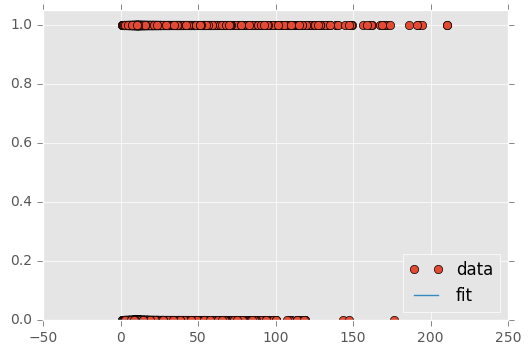

In [179]:
import numpy as np
import pylab
from scipy.optimize import curve_fit


#sigmoid function f(x) = 1/ (1 + e^[-(interceptB0 + coefB1 * x)])
def sigmoid(x, x0, k):
     y = 1 / (1 + np.exp(-k*(x-x0)))
     return y

xdata = np.sqrt(X_train)
ydata = y_train

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print popt

x = np.linspace(-1, 15, 50)
y = sigmoid(x, *popt)


pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.ylim(0, 1.05)
pylab.legend(loc='best')
pylab.show()

In [163]:
xpts = np.linspace(-10000, 50000, X_train)
#sigmoid function f(x) = 1/ (1 + e^[-(interceptB0 + coefB1 * x)])
ypts = 1/(1 + np.exp(-X_train(beta0hat + beta1hat)))

jitter = scs.uniform(-0.1,0.2).rvs(len(X_train))

fig, ax = plt.subplots(figsize=(10,4))

ax.scatter(X_train, y_train + jitter, s=20, c='green', alpha = 0.1, label='Total expenses ($)')
ax.plot(xpts, ypts, color = "blue", label = "fitted curve")
ax.axhline(0.5, color = "red")
#ax.axvline(np.percentile(X_train, 90), color='black')
ax.set_title("Fitted logistic curve")
ax.legend(loc='lower right')
#plt.show

TypeError: only length-1 arrays can be converted to Python scalars

In [50]:
'''clf =svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)'''
#clf.fit(X_train, y_train)
#clf.score(X_test, y_test)

[-0.46867077] [[ 0.00022509]]


In [ ]:
#xpts = np.linspace(-9, 9, 100)
#sigmoid function f(x) = 1/ (1 + e^[-(interceptB0 + coefB1 * x)])
#ypts = 1/(1 + np.exp(-(beta0hat + beta1hat * X_train)))

#jitter = scs.uniform(-0.03,0.06).rvs(npts)
#fig,ax = plt.subplots(figsize=(8,5))
#ax.scatter(X[:,0], y + jitter, s=10, alpha=0.5, label="generated data")
#ax.plot(xpts, ypts, 'r', label='fitted curve')
#ax.axhline(0.5, color='black')
#ax.axvline(-beta0/beta1, color='black', label='actual boundary')
#ax.set_title("Fitted logistic curve")
#ax.legend(loc='center right')

In [124]:
probabilities

array([[ 0.60088484,  0.39911516],
       [ 0.33603838,  0.66396162],
       [ 0.60630646,  0.39369354],
       ..., 
       [ 0.59834343,  0.40165657],
       [ 0.60694564,  0.39305436],
       [ 0.59626281,  0.40373719]])

NameError: name 'scipy' is not defined

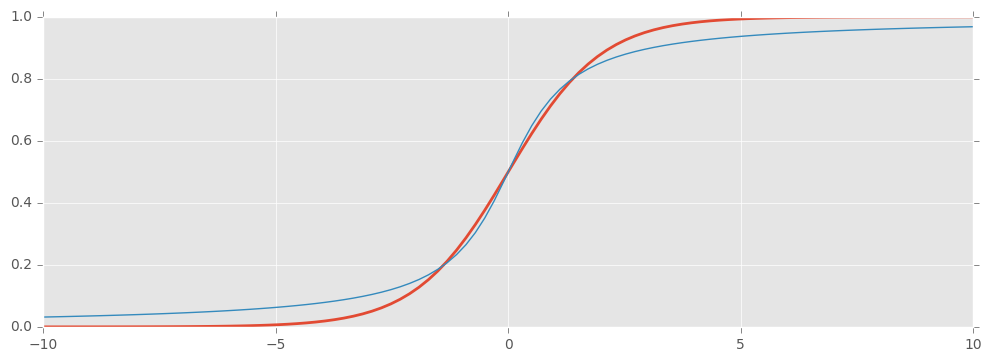

In [86]:
#Jack's
fig, ax = plt.subplots(figsize=(12,4))
xpts = np.linspace(-10, 10, 100)
ax.plot(xpts, 1/(1+np.exp(-xpts)), label='logistic', lw=2)
ax.plot(xpts, np.arctan(xpts)/np.pi + 0.5, label='arctan (rescaled)')
ax.plot(xpts, (1+scipy.special.erf(xpts/np.sqrt(2)))/2, label='inverse probit')
ax.legend(loc='best')
ax.set_title("Assorted monotonic functions going from 0 to 1")

In [12]:
import numpy as np
np.log10(100)

2.0

In [13]:
np.log10(10)

1.0